# Magnetic Kipp Plot 

In [119]:
import mesa_reader as mr
import matplotlib.pyplot as plt
import cmocean

####################################################
# Plt Options from Perna, Lazzati & Cantiello 2017 #
####################################################
plt.rcParams['figure.figsize'] = (12,8) #(6,5)
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['font.size'] = 16
plt.rcParams['legend.borderpad'] = 0.5
plt.rc('legend', borderpad=0.2, markerscale=15., fancybox=False)
plt.rcParams['legend.labelspacing'] = 0.5
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['legend.handlelength'] = 1
plt.rcParams["legend.framealpha"] = 1.0
####################################################

BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)

COLORS=[ORANGE,BLUE_GREEN,SKY_BLUE,RED_PURPLE,VERMILLION,YELLOW,BLUE,BLACK]

logteff=r'$\log_{10}\, T_{\rm eff}$/K'
logell=r'$\log_{10}\, L$/L$_\odot$'
logteff=r'$\log_{10}\, T_{\rm eff}\,/\,$K'
logell=r'$\log_{10}\, L\, / \, {\rm L}_\odot$'
rho_title = r'$\rho_{\rm AGN}$ [g cm$^{-3}$]'
logtstar=r'$\log_{10}\, T_{\star}\,/\,$K'
logtstar=r'$\log_{10}\, T_{\ast}\,/\,$K'

rsun = 6.956e10

765218878.7689533
2.5/LOGS ['2.5/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


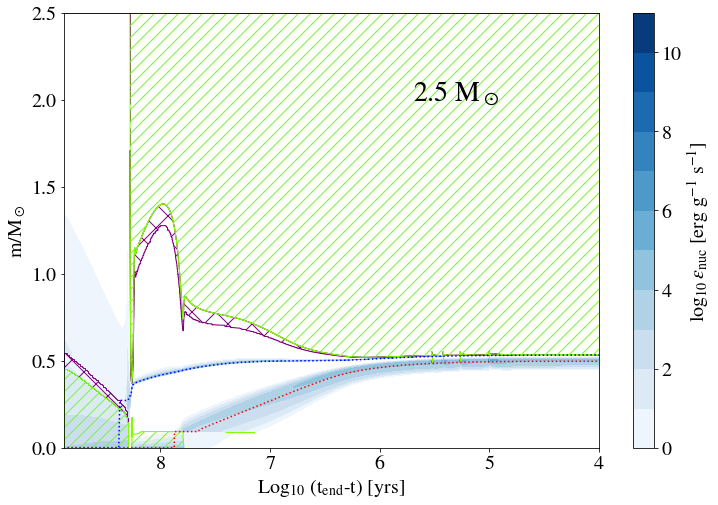

In [120]:
import mkipp
import matplotlib.pyplot as plt
import numpy as np
import mesa_data
#read out max age of star first, then create a log(tf-t) plot
fig = plt.figure()
axis = plt.gca()
#only need to read star_age column first
DIR='2.5'

history = mesa_data.mesa_data(DIR+"/LOGS/history.data",  read_data_cols = ["star_age"])
max_age = max(history.get("star_age"))

print(max_age)
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(
        logs_dirs=[DIR+"/LOGS"],
        xaxis = "star_age",
        time_units = "yr",
        function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
        decorate_plot = False,
        core_masses = ["He","C"],       #,"O","Si","Fe"],
        levels = np.arange(0.0,12,1), 
        save_file = False), axis = axis)

bar = plt.colorbar(kipp_plot.contour_plot,pad=0.05)
bar.set_label(r"$\log_{10}\, \epsilon_{\rm nuc}$ [erg g$^{-1}$ s$^{-1}$]")
axis.set_xlabel(r"Log$_{10}$ (t$_{\rm end}$-t) [yrs]")

axis.set_ylabel("m/M$_\odot$")

axis.text(5.7, 2, DIR+r' M$_\odot$', {'color': 'black', 'fontsize': 28})
#axis.text(3.7, 3.7, r'B =$\sqrt{4\pi\rho} \, v_{\rm c}$', {'color': 'black', 'fontsize': 16})

#axis.text(7.7, 1.2, 'H', {'color': 'black', 'fontsize': 20})
#axis.text(7.2, 0.45, 'He', {'color': 'blue', 'fontsize': 20})
#axis.text(3.4, 0.45, 'CO', {'color': 'red', 'fontsize': 20})

plt.xlim(np.log10(max_age),4)
plt.ylim(0,2.5)

plt.savefig("Kipp_"+DIR+".pdf",bbox_inches='tight')


765218878.7689533
2.5/LOGS ['2.5/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


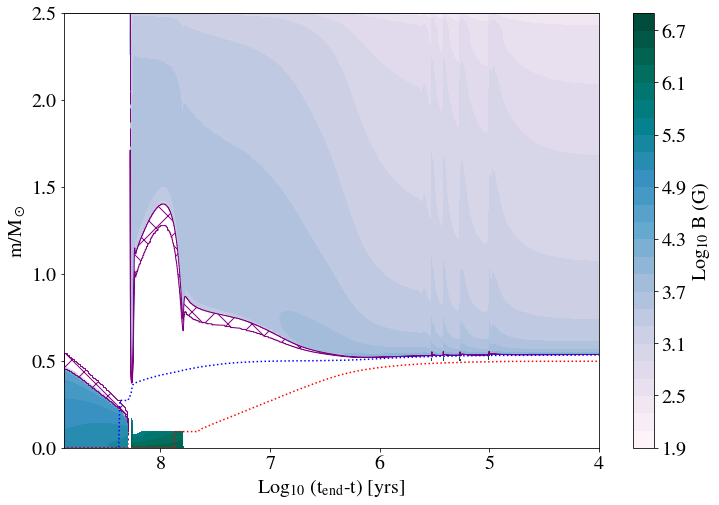

In [121]:
DIR='2.5'


def b_extractor(identifier, log10_on_data, prof, return_data_columns = False):
    if return_data_columns:
        return ["logRho", "log_conv_vel"]
    data = ((4*3.1415*10**prof.get("logRho"))**0.5)*10**prof.get("log_conv_vel")
    if log10_on_data:
        return np.log10(data)
    else:
        return data
    
    
import mkipp
import matplotlib.pyplot as plt
import numpy as np
import mesa_data
#read out max age of star first, then create a log(tf-t) plot
fig = plt.figure()
axis = plt.gca()
#only need to read star_age column first

history = mesa_data.mesa_data(DIR+"/LOGS/history.data",  read_data_cols = ["star_age"])
max_age = max(history.get("star_age"))
print(max_age)
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(
        logs_dirs=[DIR+"/LOGS"],
        xaxis = "star_age",
        time_units = "yr",
        function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
        extractor = b_extractor,
        decorate_plot = False,
        show_conv = False,
        core_masses = ["He","C"],
        contour_colormap = plt.get_cmap("PuBuGn"), #plt.get_cmap("viridis"),#plt.get_cmap("plasma"),# plt.get_cmap("BuPu"),
        levels = np.arange(1.9,7.0,0.2), 
        save_file = False), axis = axis)

bar = plt.colorbar(kipp_plot.contour_plot,pad=0.05)
#bar.set_label(r"$\log_{10}\, \epsilon_{\rm nuc}$ [erg g$^{-1}$ s$^{-1}$]")
bar.set_label("Log$_{10}$ B (G)")

axis.set_xlabel(r"Log$_{10}$ (t$_{\rm end}$-t) [yrs]")
axis.set_ylabel(r"m/M$_\odot$")
#axis.text(1.6, 4.3, DIR+r' M$_\odot$', {'color': 'black', 'fontsize': 28})
#axis.text(1.5, 3.8, r'B =$\sqrt{4\pi\rho} \, v_{\rm c}$', {'color': 'black', 'fontsize': 16})

#axis.set_ylabel("")


plt.xlim(np.log10(max_age),4) 
plt.ylim(0,2.5)

plt.savefig("Kipp_bfields"+DIR+".pdf",bbox_inches='tight')


2.5/LOGS ['2.5/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


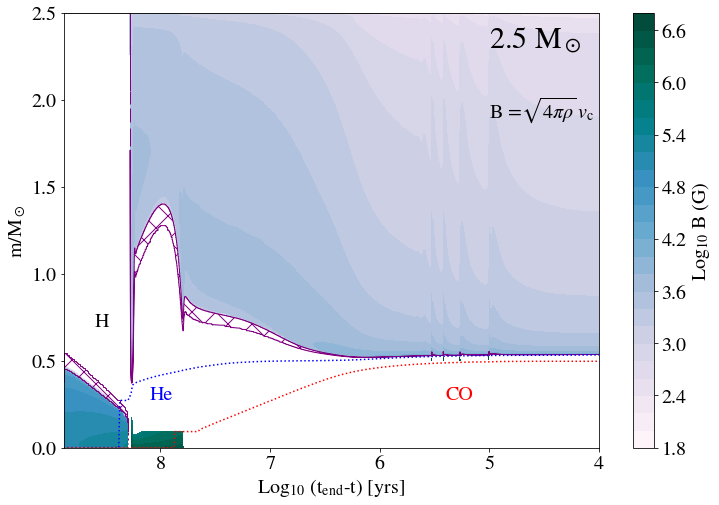

In [126]:
def b_extractor(identifier, log10_on_data, prof, return_data_columns = False):
    if return_data_columns:
        return ["logRho", "log_conv_vel"]
    data = ((4*3.1415*10**prof.get("logRho"))**0.5)*10**prof.get("log_conv_vel")
    if log10_on_data:
        return np.log10(data)
    else:
        return data
    
    
import mkipp
import matplotlib.pyplot as plt
import numpy as np
import mesa_data
#read out max age of star first, then create a log(tf-t) plot
fig = plt.figure()
axis = plt.gca()
#only need to read star_age column first


history = mesa_data.mesa_data(DIR+"/LOGS/history.data",  read_data_cols = ["star_age"])
max_age = max(history.get("star_age"))

kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(
        logs_dirs=[DIR+"/LOGS"],
        xaxis = "star_age",
        time_units = "yr",
        function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
        extractor = b_extractor,
        decorate_plot = False,
        show_conv = False,
        core_masses = ["He","C"],
        contour_colormap = plt.get_cmap("PuBuGn"),#plt.get_cmap("PuBuGn"),#plt.get_cmap("plasma"),# plt.get_cmap("BuPu"),
        levels = np.arange(1.8,7.0,0.2), 
        save_file = False), axis = axis)

bar = plt.colorbar(kipp_plot.contour_plot,pad=0.05)
#bar.set_label(r"$\log_{10}\, \epsilon_{\rm nuc}$ [erg g$^{-1}$ s$^{-1}$]")
bar.set_label("Log$_{10}$ B (G)")

axis.set_xlabel(r"Log$_{10}$ (t$_{\rm end}$-t) [yrs]")
axis.set_ylabel(r"m/M$_\odot$")

axis.text(5, 2.3, DIR+r' M$_\odot$', {'color': 'black', 'fontsize': 30})
axis.text(5, 1.9, r'B =$\sqrt{4\pi\rho} \, v_{\rm c}$', {'color': 'black', 'fontsize': 20})

axis.text(8.6, 0.7, 'H', {'color': 'black', 'fontsize': 20})
axis.text(8.1, 0.28, 'He', {'color': 'blue', 'fontsize': 20})
axis.text(5.4, 0.28, 'CO', {'color': 'red', 'fontsize': 20})
#axis.text(1, 0.4, 'O', {'color': 'green', 'fontsize': 20})
#axis.set_ylabel("")



plt.xlim(np.log10(max_age),4) 
plt.ylim(0,2.5)

plt.savefig("Kipp_bfields_cores_"+DIR+".pdf",bbox_inches='tight')


2.5/LOGS ['2.5/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


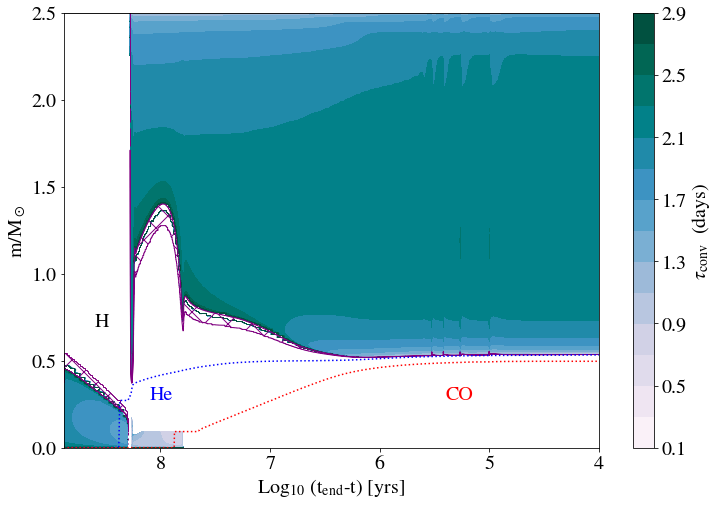

In [128]:
def b_extractor(identifier, log10_on_data, prof, return_data_columns = False):
    if return_data_columns:
        return ["logRho", "log_conv_vel"]
    data = ((4*3.1415*10**prof.get("logRho"))**0.5)*10**prof.get("log_conv_vel")
    if log10_on_data:
        return np.log10(data)
    else:
        return data
    
def tau_extractor(identifier, log10_on_data, prof, return_data_columns = False):
    if return_data_columns:
        return ["pressure_scale_height", "log_conv_vel"] # pressure_scale_height in Rsun
    
    
    
    numerator = 2 * prof.get("pressure_scale_height") * rsun
    denominator = 10**prof.get("log_conv_vel") 
    
    
    # Create a mask for values where the numerator divided by 10**prof.get("log_conv_vel") is less than 1
    mask = (prof.get("log_conv_vel")) < -1
    
    data = numerator / denominator / 3600 / 24.0
    data[mask] = 0.000001
    
    #print(data/3600/24.0)
    
    
    if log10_on_data:
        return np.log10(data)
    else:
        return data
        
    
import mkipp
import matplotlib.pyplot as plt
import numpy as np
import mesa_data
#read out max age of star first, then create a log(tf-t) plot
fig = plt.figure()
axis = plt.gca()
#only need to read star_age column first

history = mesa_data.mesa_data(DIR+"/LOGS/history.data",  read_data_cols = ["star_age"])
max_age = max(history.get("star_age"))

kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(
        logs_dirs=[DIR+"/LOGS"],
        xaxis = "star_age",
        time_units = "yr",
        function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
        extractor = tau_extractor,
        decorate_plot = False,
        show_conv = False,
        core_masses = ["He","C"],
        contour_colormap = plt.get_cmap("PuBuGn"),#plt.get_cmap("PuBuGn"),#plt.get_cmap("plasma"),# plt.get_cmap("BuPu"),
        levels = np.arange(0.1,3,0.2), 
        save_file = False), axis = axis)

bar = plt.colorbar(kipp_plot.contour_plot,pad=0.05)
#bar.set_label(r"$\log_{10}\, \epsilon_{\rm nuc}$ [erg g$^{-1}$ s$^{-1}$]")
bar.set_label(r"$\tau_{\rm conv}$  (days)")

axis.set_xlabel(r"Log$_{10}$ (t$_{\rm end}$-t) [yrs]")
axis.set_ylabel(r"m/M$_\odot$")

#axis.text(3.7, 4.3, DIR+r' M$_\odot$', {'color': 'black', 'fontsize': 28})
#axis.text(3.7, 3.7, r'B =$\sqrt{4\pi\rho} \, v_{\rm c}$', {'color': 'black', 'fontsize': 16})

axis.text(8.6, 0.7, 'H', {'color': 'black', 'fontsize': 20})
axis.text(8.1, 0.28, 'He', {'color': 'blue', 'fontsize': 20})
axis.text(5.4, 0.28, 'CO', {'color': 'red', 'fontsize': 20})
#axis.text(1, 0.4, 'O', {'color': 'green', 'fontsize': 20})
#axis.set_ylabel("")



plt.xlim(np.log10(max_age),4) 
plt.ylim(0,2.5)

plt.savefig("Kipp_turnover_"+DIR+".pdf",bbox_inches='tight')


765218878.7689533
2.5/LOGS ['2.5/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


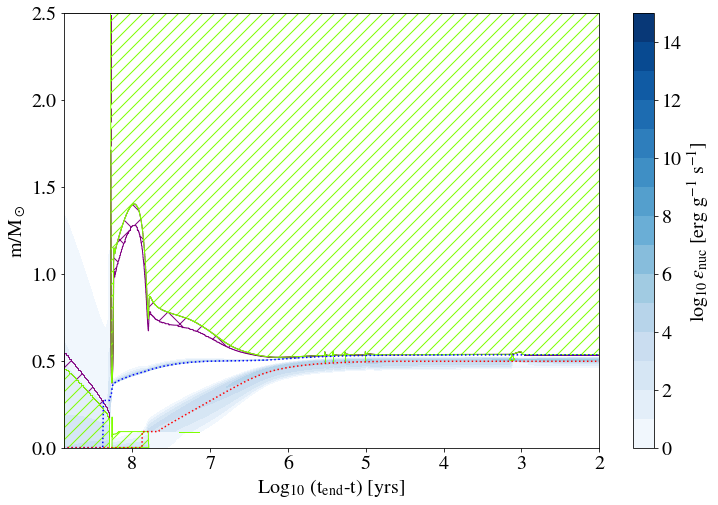

In [125]:
import mkipp
import matplotlib.pyplot as plt
import numpy as np
import mesa_data
#read out max age of star first, then create a log(tf-t) plot
fig = plt.figure()
axis = plt.gca()
#only need to read star_age column first
DIR='2.5'

history = mesa_data.mesa_data(DIR+"/LOGS/history.data",  read_data_cols = ["star_age"])
max_age = max(history.get("star_age"))

print(max_age)
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(
        logs_dirs=[DIR+"/LOGS"],
        xaxis = "star_age",
        time_units = "yr",
        function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
        decorate_plot = False,
        core_masses = ["He","C"],
        levels = np.arange(0.0,16,1), 
        save_file = False), axis = axis)

bar = plt.colorbar(kipp_plot.contour_plot,pad=0.05)
bar.set_label(r"$\log_{10}\, \epsilon_{\rm nuc}$ [erg g$^{-1}$ s$^{-1}$]")
axis.set_xlabel(r"Log$_{10}$ (t$_{\rm end}$-t) [yrs]")

axis.set_ylabel("m/M$_\odot$")



plt.xlim(np.log10(max_age),2)
plt.ylim(0,2.5)

plt.savefig("Kipp_"+DIR+".pdf",bbox_inches='tight')


765113163.35999
2.5/LOGS ['2.5/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


<ipython-input-115-0645e74c6dbc>:27: RuntimeWarning: invalid value encountered in log10
  function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
<ipython-input-115-0645e74c6dbc>:27: RuntimeWarning: invalid value encountered in log10
  function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
<ipython-input-115-0645e74c6dbc>:27: RuntimeWarning: invalid value encountered in log10
  function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),


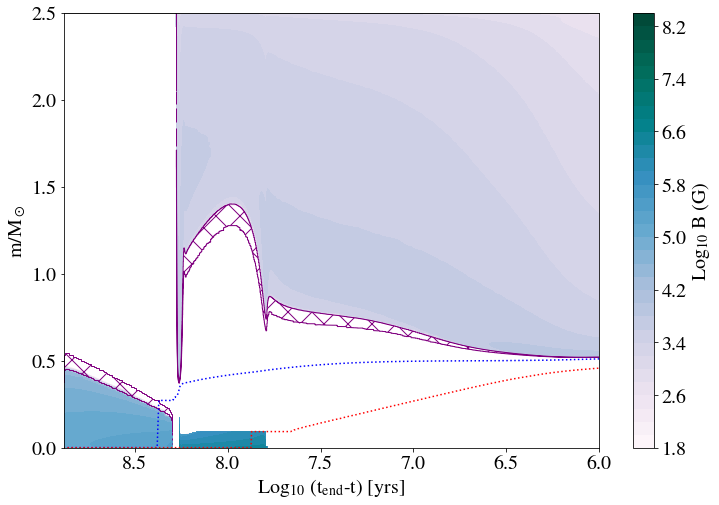

In [115]:

def b_extractor(identifier, log10_on_data, prof, return_data_columns = False):
    if return_data_columns:
        return ["logRho", "log_conv_vel"]
    data = ((4*3.1415*10**prof.get("logRho"))**0.5)*10**prof.get("log_conv_vel")
    if log10_on_data:
        return np.log10(data)
    else:
        return data
    
    
import mkipp
import matplotlib.pyplot as plt
import numpy as np
import mesa_data
#read out max age of star first, then create a log(tf-t) plot
fig = plt.figure()
axis = plt.gca()
#only need to read star_age column first

history = mesa_data.mesa_data(DIR+"/LOGS/history.data",  read_data_cols = ["star_age"])
max_age = max(history.get("star_age"))
print(max_age)
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(
        logs_dirs=[DIR+"/LOGS"],
        xaxis = "star_age",
        time_units = "yr",
        function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
        extractor = b_extractor,
        decorate_plot = False,
        show_conv = False,
        core_masses = ["He","C"],
        contour_colormap = plt.get_cmap("PuBuGn"), #plt.get_cmap("viridis"),#plt.get_cmap("plasma"),# plt.get_cmap("BuPu"),
        levels = np.arange(1.8,8.6,0.2), 
        save_file = False), axis = axis)

bar = plt.colorbar(kipp_plot.contour_plot,pad=0.05)
#bar.set_label(r"$\log_{10}\, \epsilon_{\rm nuc}$ [erg g$^{-1}$ s$^{-1}$]")
bar.set_label("Log$_{10}$ B (G)")

axis.set_xlabel(r"Log$_{10}$ (t$_{\rm end}$-t) [yrs]")
axis.set_ylabel(r"m/M$_\odot$")
#axis.text(3.7, 4.3, DIR+r' M$_\odot$', {'color': 'black', 'fontsize': 28})
#axis.text(3.7, 3.8, r'B =$\sqrt{4\pi\rho} \, v_{\rm c}$', {'color': 'black', 'fontsize': 16})

#axis.set_ylabel("")


plt.xlim(np.log10(max_age),6) 
plt.ylim(0,2.5)

plt.savefig("Kipp_bfields"+DIR+".pdf",bbox_inches='tight')


## 5 MSUN

110357202.59993103
5.0/LOGS ['5.0/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


<ipython-input-68-55644e1b36bb>:19: RuntimeWarning: invalid value encountered in log10
  function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
<ipython-input-68-55644e1b36bb>:19: RuntimeWarning: invalid value encountered in log10
  function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
<ipython-input-68-55644e1b36bb>:19: RuntimeWarning: invalid value encountered in log10
  function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),


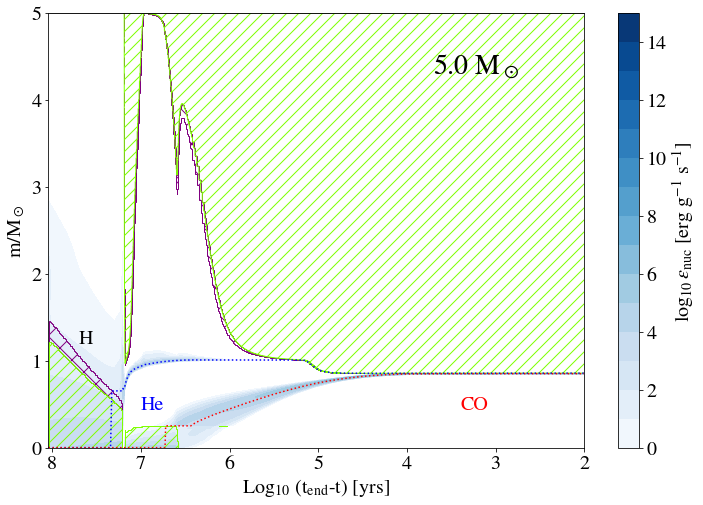

In [68]:
import mkipp
import matplotlib.pyplot as plt
import numpy as np
import mesa_data
#read out max age of star first, then create a log(tf-t) plot
fig = plt.figure()
axis = plt.gca()
#only need to read star_age column first
DIR='5.0'

history = mesa_data.mesa_data(DIR+"/LOGS/history.data",  read_data_cols = ["star_age"])
max_age = max(history.get("star_age"))

print(max_age)
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(
        logs_dirs=[DIR+"/LOGS"],
        xaxis = "star_age",
        time_units = "yr",
        function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
        decorate_plot = False,
        core_masses = ["He","C"],
        levels = np.arange(0.0,16,1), 
        save_file = False), axis = axis)

bar = plt.colorbar(kipp_plot.contour_plot,pad=0.05)
bar.set_label(r"$\log_{10}\, \epsilon_{\rm nuc}$ [erg g$^{-1}$ s$^{-1}$]")
axis.set_xlabel(r"Log$_{10}$ (t$_{\rm end}$-t) [yrs]")

axis.set_ylabel("m/M$_\odot$")

axis.text(3.7, 4.3, DIR+r' M$_\odot$', {'color': 'black', 'fontsize': 28})
#axis.text(3.7, 3.7, r'B =$\sqrt{4\pi\rho} \, v_{\rm c}$', {'color': 'black', 'fontsize': 16})

axis.text(7.7, 1.2, 'H', {'color': 'black', 'fontsize': 20})
axis.text(7.0, 0.45, 'He', {'color': 'blue', 'fontsize': 20})
axis.text(3.4, 0.45, 'CO', {'color': 'red', 'fontsize': 20})

plt.xlim(np.log10(max_age),2)
plt.ylim(0,5)

plt.savefig("Kipp_"+DIR+".pdf",bbox_inches='tight')


5.0/LOGS ['5.0/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


<ipython-input-82-6bdfe9a8be40>:28: RuntimeWarning: invalid value encountered in log10
  function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
<ipython-input-82-6bdfe9a8be40>:28: RuntimeWarning: invalid value encountered in log10
  function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
<ipython-input-82-6bdfe9a8be40>:28: RuntimeWarning: invalid value encountered in log10
  function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),


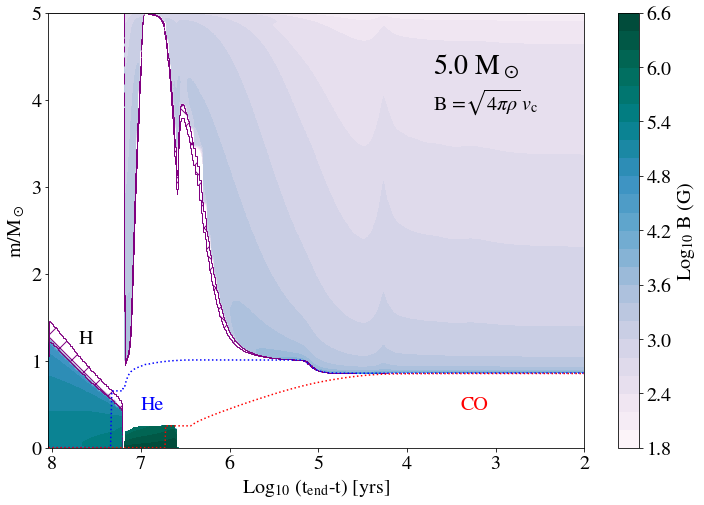

In [82]:
def b_extractor(identifier, log10_on_data, prof, return_data_columns = False):
    if return_data_columns:
        return ["logRho", "log_conv_vel"]
    data = ((4*3.1415*10**prof.get("logRho"))**0.5)*10**prof.get("log_conv_vel")
    if log10_on_data:
        return np.log10(data)
    else:
        return data
    
    
import mkipp
import matplotlib.pyplot as plt
import numpy as np
import mesa_data
#read out max age of star first, then create a log(tf-t) plot
fig = plt.figure()
axis = plt.gca()
#only need to read star_age column first


history = mesa_data.mesa_data(DIR+"/LOGS/history.data",  read_data_cols = ["star_age"])
max_age = max(history.get("star_age"))

kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(
        logs_dirs=[DIR+"/LOGS"],
        xaxis = "star_age",
        time_units = "yr",
        function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
        extractor = b_extractor,
        decorate_plot = False,
        show_conv = False,
        core_masses = ["He","C"],
        contour_colormap = plt.get_cmap("PuBuGn"),#plt.get_cmap("PuBuGn"),#plt.get_cmap("plasma"),# plt.get_cmap("BuPu"),
        levels = np.arange(1.8,6.8,0.2), 
        save_file = False), axis = axis)

bar = plt.colorbar(kipp_plot.contour_plot,pad=0.05)
#bar.set_label(r"$\log_{10}\, \epsilon_{\rm nuc}$ [erg g$^{-1}$ s$^{-1}$]")
bar.set_label("Log$_{10}$ B (G)")

axis.set_xlabel(r"Log$_{10}$ (t$_{\rm end}$-t) [yrs]")
axis.set_ylabel(r"m/M$_\odot$")



axis.text(3.7, 4.3, DIR+r' M$_\odot$', {'color': 'black', 'fontsize': 28})
axis.text(3.7, 3.9, r'B =$\sqrt{4\pi\rho} \, v_{\rm c}$', {'color': 'black', 'fontsize': 20})

axis.text(7.7, 1.2, 'H', {'color': 'black', 'fontsize': 20})
axis.text(7.0, 0.45, 'He', {'color': 'blue', 'fontsize': 20})
axis.text(3.4, 0.45, 'CO', {'color': 'red', 'fontsize': 20})


plt.xlim(np.log10(max_age),2) 
plt.ylim(0,5)

plt.savefig("Kipp_bfields_cores_"+DIR+".pdf",bbox_inches='tight')


5.0/LOGS ['5.0/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


<ipython-input-78-a3e28237e8a5>:51: RuntimeWarning: invalid value encountered in log10
  function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
<ipython-input-78-a3e28237e8a5>:51: RuntimeWarning: invalid value encountered in log10
  function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
<ipython-input-78-a3e28237e8a5>:51: RuntimeWarning: invalid value encountered in log10
  function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),


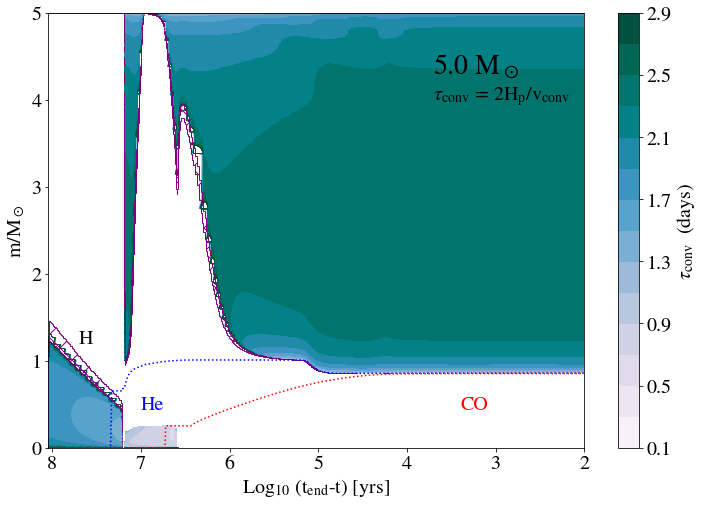

In [78]:
def b_extractor(identifier, log10_on_data, prof, return_data_columns = False):
    if return_data_columns:
        return ["logRho", "log_conv_vel"]
    data = ((4*3.1415*10**prof.get("logRho"))**0.5)*10**prof.get("log_conv_vel")
    if log10_on_data:
        return np.log10(data)
    else:
        return data
    
def tau_extractor(identifier, log10_on_data, prof, return_data_columns = False):
    if return_data_columns:
        return ["pressure_scale_height", "log_conv_vel"] # pressure_scale_height in Rsun
    
    
    
    numerator = 2 * prof.get("pressure_scale_height") * rsun
    denominator = 10**prof.get("log_conv_vel") 
    
    
    # Create a mask for values where the numerator divided by 10**prof.get("log_conv_vel") is less than 1
    mask = (prof.get("log_conv_vel")) < -1
    
    data = numerator / denominator / 3600 / 24.0
    data[mask] = 0.000001
    
    #print(data/3600/24.0)
    
    
    if log10_on_data:
        return np.log10(data)
    else:
        return data
        
    
import mkipp
import matplotlib.pyplot as plt
import numpy as np
import mesa_data
#read out max age of star first, then create a log(tf-t) plot
fig = plt.figure()
axis = plt.gca()
#only need to read star_age column first

history = mesa_data.mesa_data(DIR+"/LOGS/history.data",  read_data_cols = ["star_age"])
max_age = max(history.get("star_age"))

kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(
        logs_dirs=[DIR+"/LOGS"],
        xaxis = "star_age",
        time_units = "yr",
        function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
        extractor = tau_extractor,
        decorate_plot = False,
        show_conv = False,
        core_masses = ["He","C"],
        contour_colormap = plt.get_cmap("PuBuGn"),#plt.get_cmap("PuBuGn"),#plt.get_cmap("plasma"),# plt.get_cmap("BuPu"),
        levels = np.arange(0.1,3,0.2), 
        save_file = False), axis = axis)

bar = plt.colorbar(kipp_plot.contour_plot,pad=0.05)
#bar.set_label(r"$\log_{10}\, \epsilon_{\rm nuc}$ [erg g$^{-1}$ s$^{-1}$]")
bar.set_label(r"$\tau_{\rm conv}$  (days)")

axis.set_xlabel(r"Log$_{10}$ (t$_{\rm end}$-t) [yrs]")
axis.set_ylabel(r"m/M$_\odot$")

#axis.text(3.7, 4.3, DIR+r' M$_\odot$', {'color': 'black', 'fontsize': 28})
#axis.text(3.7, 3.7, r'B =$\sqrt{4\pi\rho} \, v_{\rm c}$', {'color': 'black', 'fontsize': 16})

axis.text(3.7, 4.3, DIR+r' M$_\odot$', {'color': 'black', 'fontsize': 28})
axis.text(3.7, 4.0, r'$\tau_{\rm conv}$ = 2H$_{\rm p}$/v$_{\rm conv}$', {'color': 'black', 'fontsize': 20})

axis.text(7.7, 1.2, 'H', {'color': 'black', 'fontsize': 20})
axis.text(7.0, 0.45, 'He', {'color': 'blue', 'fontsize': 20})
axis.text(3.4, 0.45, 'CO', {'color': 'red', 'fontsize': 20})


plt.xlim(np.log10(max_age),2) 
plt.ylim(0,5)


plt.savefig("Kipp_turnover_"+DIR+".pdf",bbox_inches='tight')


5.0/LOGS ['5.0/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


<ipython-input-81-57b681760c78>:28: RuntimeWarning: invalid value encountered in log10
  function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
<ipython-input-81-57b681760c78>:28: RuntimeWarning: invalid value encountered in log10
  function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
<ipython-input-81-57b681760c78>:28: RuntimeWarning: invalid value encountered in log10
  function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),


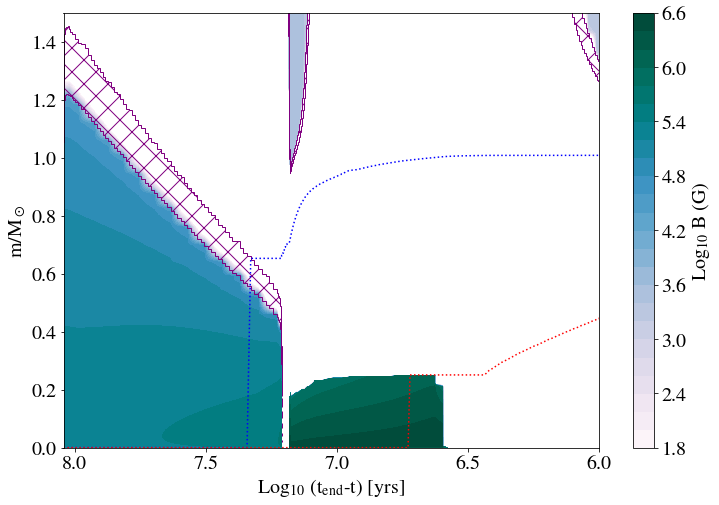

In [81]:
def b_extractor(identifier, log10_on_data, prof, return_data_columns = False):
    if return_data_columns:
        return ["logRho", "log_conv_vel"]
    data = ((4*3.1415*10**prof.get("logRho"))**0.5)*10**prof.get("log_conv_vel")
    if log10_on_data:
        return np.log10(data)
    else:
        return data
    
    
import mkipp
import matplotlib.pyplot as plt
import numpy as np
import mesa_data
#read out max age of star first, then create a log(tf-t) plot
fig = plt.figure()
axis = plt.gca()
#only need to read star_age column first


history = mesa_data.mesa_data(DIR+"/LOGS/history.data",  read_data_cols = ["star_age"])
max_age = max(history.get("star_age"))

kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(
        logs_dirs=[DIR+"/LOGS"],
        xaxis = "star_age",
        time_units = "yr",
        function_on_xaxis = lambda x: np.log10(max_age+0.01 - x),
        extractor = b_extractor,
        decorate_plot = False,
        show_conv = False,
        core_masses = ["He","C"],
        contour_colormap = plt.get_cmap("PuBuGn"),#plt.get_cmap("PuBuGn"),#plt.get_cmap("plasma"),# plt.get_cmap("BuPu"),
        levels = np.arange(1.8,6.8,0.2), 
        save_file = False), axis = axis)

bar = plt.colorbar(kipp_plot.contour_plot,pad=0.05)
#bar.set_label(r"$\log_{10}\, \epsilon_{\rm nuc}$ [erg g$^{-1}$ s$^{-1}$]")
bar.set_label("Log$_{10}$ B (G)")

axis.set_xlabel(r"Log$_{10}$ (t$_{\rm end}$-t) [yrs]")
axis.set_ylabel(r"m/M$_\odot$")






plt.xlim(np.log10(max_age),6) 
plt.ylim(0,1.5)

plt.savefig("Kipp_bfields_cores_zoom_"+DIR+".pdf",bbox_inches='tight')


## Radius Plots

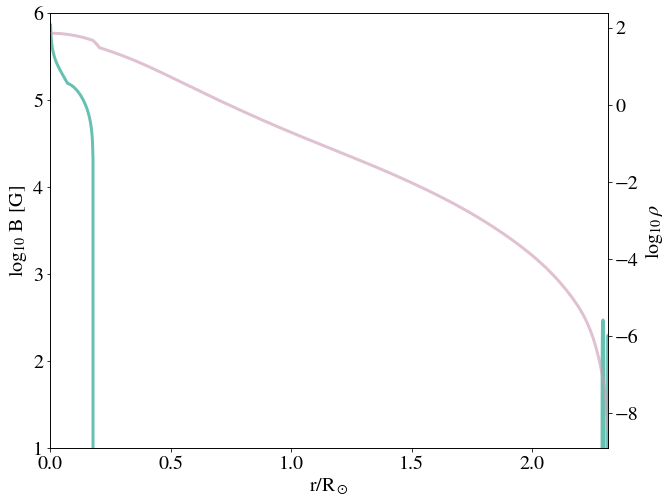

In [50]:
DIR='2.0'

fig = plt.figure()
axis = plt.gca()

#h = mesa_data.mesa_data(DIR+"/LOGS/history.data")

list = ['profile1','profile10','profile15','profile20','profile25']

list = ['profile17']#,'profile10','profile15','profile20','profile25']
for profile in list:
    p = mesa_data.mesa_data(DIR+'/LOGS/'+profile+'.data')
    max_age = max(h.get("star_age"))
    # p.header 
    # p.columns
    b = ((4*3.1415*10**p.get("logRho"))**0.5)*10**p.get("log_conv_vel")
    axis.plot(10**p.get("logR"), np.log10(b),c=BLUE_GREEN,alpha=0.6,lw=3)
    ax2 = axis.twinx()
    ax2.plot(10**p.get("logR"), p.get("logRho"),c=RED_PURPLE,alpha=0.6,lw=3)

axis.set_ylabel(r"$\log_{10}$ B [G]")
ax2.set_ylabel(r"$\log_{10}\, \rho$")

axis.set_xlabel(r"r/R$_\odot$")
axis.set_xlim(0,np.max(10**p.get("logR")))
axis.set_ylim(1,6)
plt.savefig("2M_B_radial_profile_series.pdf",bbox_inches='tight')
plt.savefig("2M_B_radial_profile_series.png",bbox_inches='tight')


In [43]:
from astropy import units as u

In [54]:

B = 10e5 
R = 0.2
Flux = (B*(R*u.R_sun**2)).cgs

In [55]:
print(Flux)

9.6799698e+26 cm2
